<a href="https://colab.research.google.com/github/henriquecbz/henriquecbz/blob/main/V_R_BIDI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  ! pip install yfinance

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
from scipy.stats import norm

In [ ]:
bidi = yf.Ticker("BIDI4.SA")

data = yf.download("BIDI4.SA", start="2020-01-01",end="2022-01-01").get("Close")

In [ ]:
data

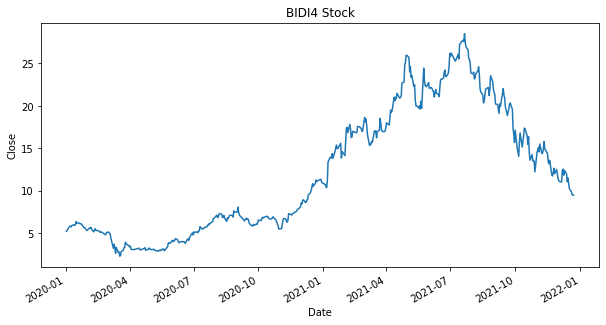

In [9]:
data.plot(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('BIDI4 Stock')
plt.show()

In [10]:
bidi_dailyreturns = data.pct_change()
print(bidi_dailyreturns.head())

Date
2020-01-02         NaN
2020-01-03    0.017834
2020-01-06    0.079474
2020-01-07    0.016232
2020-01-08   -0.008557
Name: Close, dtype: float64


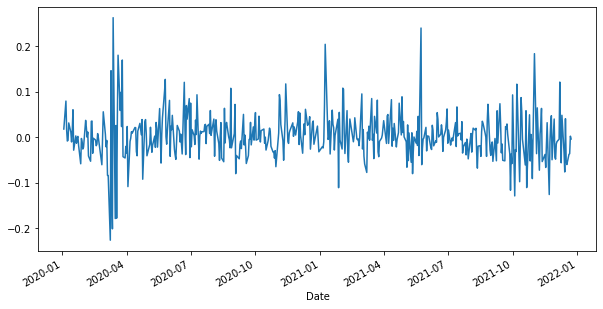

In [12]:
bidi_dailyreturns.plot(figsize=(10,5))
plt.show()

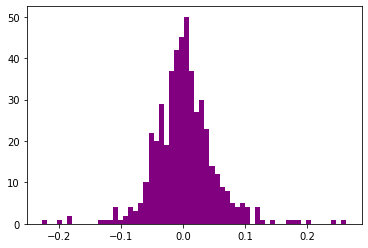

In [15]:
plt.hist(bidi_dailyreturns, bins=60, color='purple')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


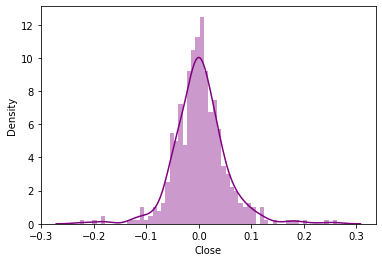

In [14]:
sns.distplot(bidi_dailyreturns, hist=True, kde=True,bins=60, color='purple')

In [13]:
mean = np.mean(bidi_dailyreturns)
std_dev = np.std(bidi_dailyreturns)
var=np.var(bidi_dailyreturns)

print('mean = '+'{:2%}'.format(mean))
print('standard deviation = '+'{:2%}'.format(std_dev))
print('variance = '+'{:2%}'.format(var))

mean = 0.251208%
standard deviation = 5.109326%
variance = 0.261052%


In [16]:
days = 50
trials = 10000
drift = mean - (0.5 * var)
Z = norm.ppf(np.random.rand(days,trials))
daily_returns = np.exp(drift + std_dev * Z)
daily_returns

array([[0.99539953, 1.04513946, 0.97006038, ..., 1.0395601 , 0.95939456,
        1.0637638 ],
       [1.00040074, 1.09522902, 0.95532708, ..., 0.98499118, 1.12240628,
        1.11198214],
       [0.94851819, 0.99746675, 1.09808263, ..., 0.99088308, 1.00047775,
        1.00362355],
       ...,
       [0.99891023, 1.00505429, 1.02354371, ..., 1.0705318 , 1.02607923,
        0.93742501],
       [1.08551193, 0.98777067, 0.933431  , ..., 1.0300573 , 0.98403755,
        0.98004835],
       [1.02559953, 1.01802612, 0.99724193, ..., 1.02202748, 0.93443278,
        1.04601501]])

 ...]

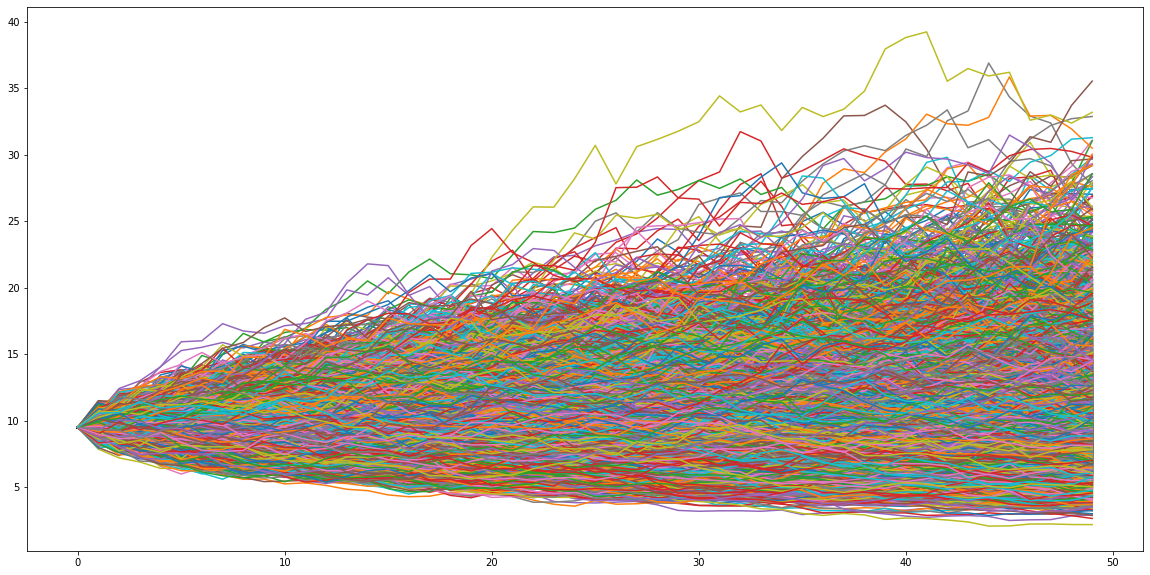

In [17]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
for t in range (1,days):
  price_paths[t] = price_paths[t-1]*daily_returns[t]
plt.figure(figsize=(20,10))
plt.plot(price_paths)